In [ ]:
import seaborn as sns
import matplotlib as plt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as mplt
import plotly as pt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "colab"
import IPython
from plotly.offline import init_notebook_mode
from plotly.offline import iplot

**Gun violence data analysis**

**1. Pre data analysis.**

Loading data and converting to a dataframe.

In [ ]:
data = pd.read_csv("/content/gun_violence_data.csv")
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [ ]:
dataframe = pd.DataFrame(data)

**Getting to know basic info about the dataframe**

In [ ]:
# data info

dataframe.info()

# data description

dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7333 entries, 0 to 7332
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   incident_id                  7333 non-null   int64  
 1   date                         7333 non-null   object 
 2   state                        7333 non-null   object 
 3   city_or_county               7333 non-null   object 
 4   address                      6753 non-null   object 
 5   n_killed                     7333 non-null   int64  
 6   n_injured                    7333 non-null   int64  
 7   incident_url                 7333 non-null   object 
 8   source_url                   7323 non-null   object 
 9   incident_url_fields_missing  7332 non-null   object 
 10  congressional_district       7308 non-null   float64
 11  gun_stolen                   714 non-null    object 
 12  gun_type                     714 non-null    object 
 13  incident_character

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,7.333000e+03,7333.000000,7333.000000,7308.000000,7312.000000,7312.000000,714.000000,6336.000000,6496.000000
mean,1.265937e+05,0.290195,0.540025,8.310755,36.943893,-88.766679,1.077031,55.492582,20.408097
std,9.400953e+04,0.611811,1.004050,8.959799,5.093826,13.681095,0.383319,38.529993,13.761843
min,9.211400e+04,0.000000,0.000000,1.000000,20.760100,-164.620000,1.000000,1.000000,1.000000
25%,9.756000e+04,0.000000,0.000000,2.000000,33.400825,-93.294675,1.000000,24.000000,9.000000
50%,1.028810e+05,0.000000,0.000000,5.000000,37.798500,-85.526700,1.000000,48.000000,19.000000
75%,1.083060e+05,0.000000,1.000000,10.000000,40.692100,-79.801225,1.000000,84.000000,30.000000
max,1.074613e+06,11.000000,19.000000,53.000000,71.300000,-68.007500,6.000000,217.000000,67.000000


**Basic data visualization of all columns combined. For this we are going to use seaborn library**

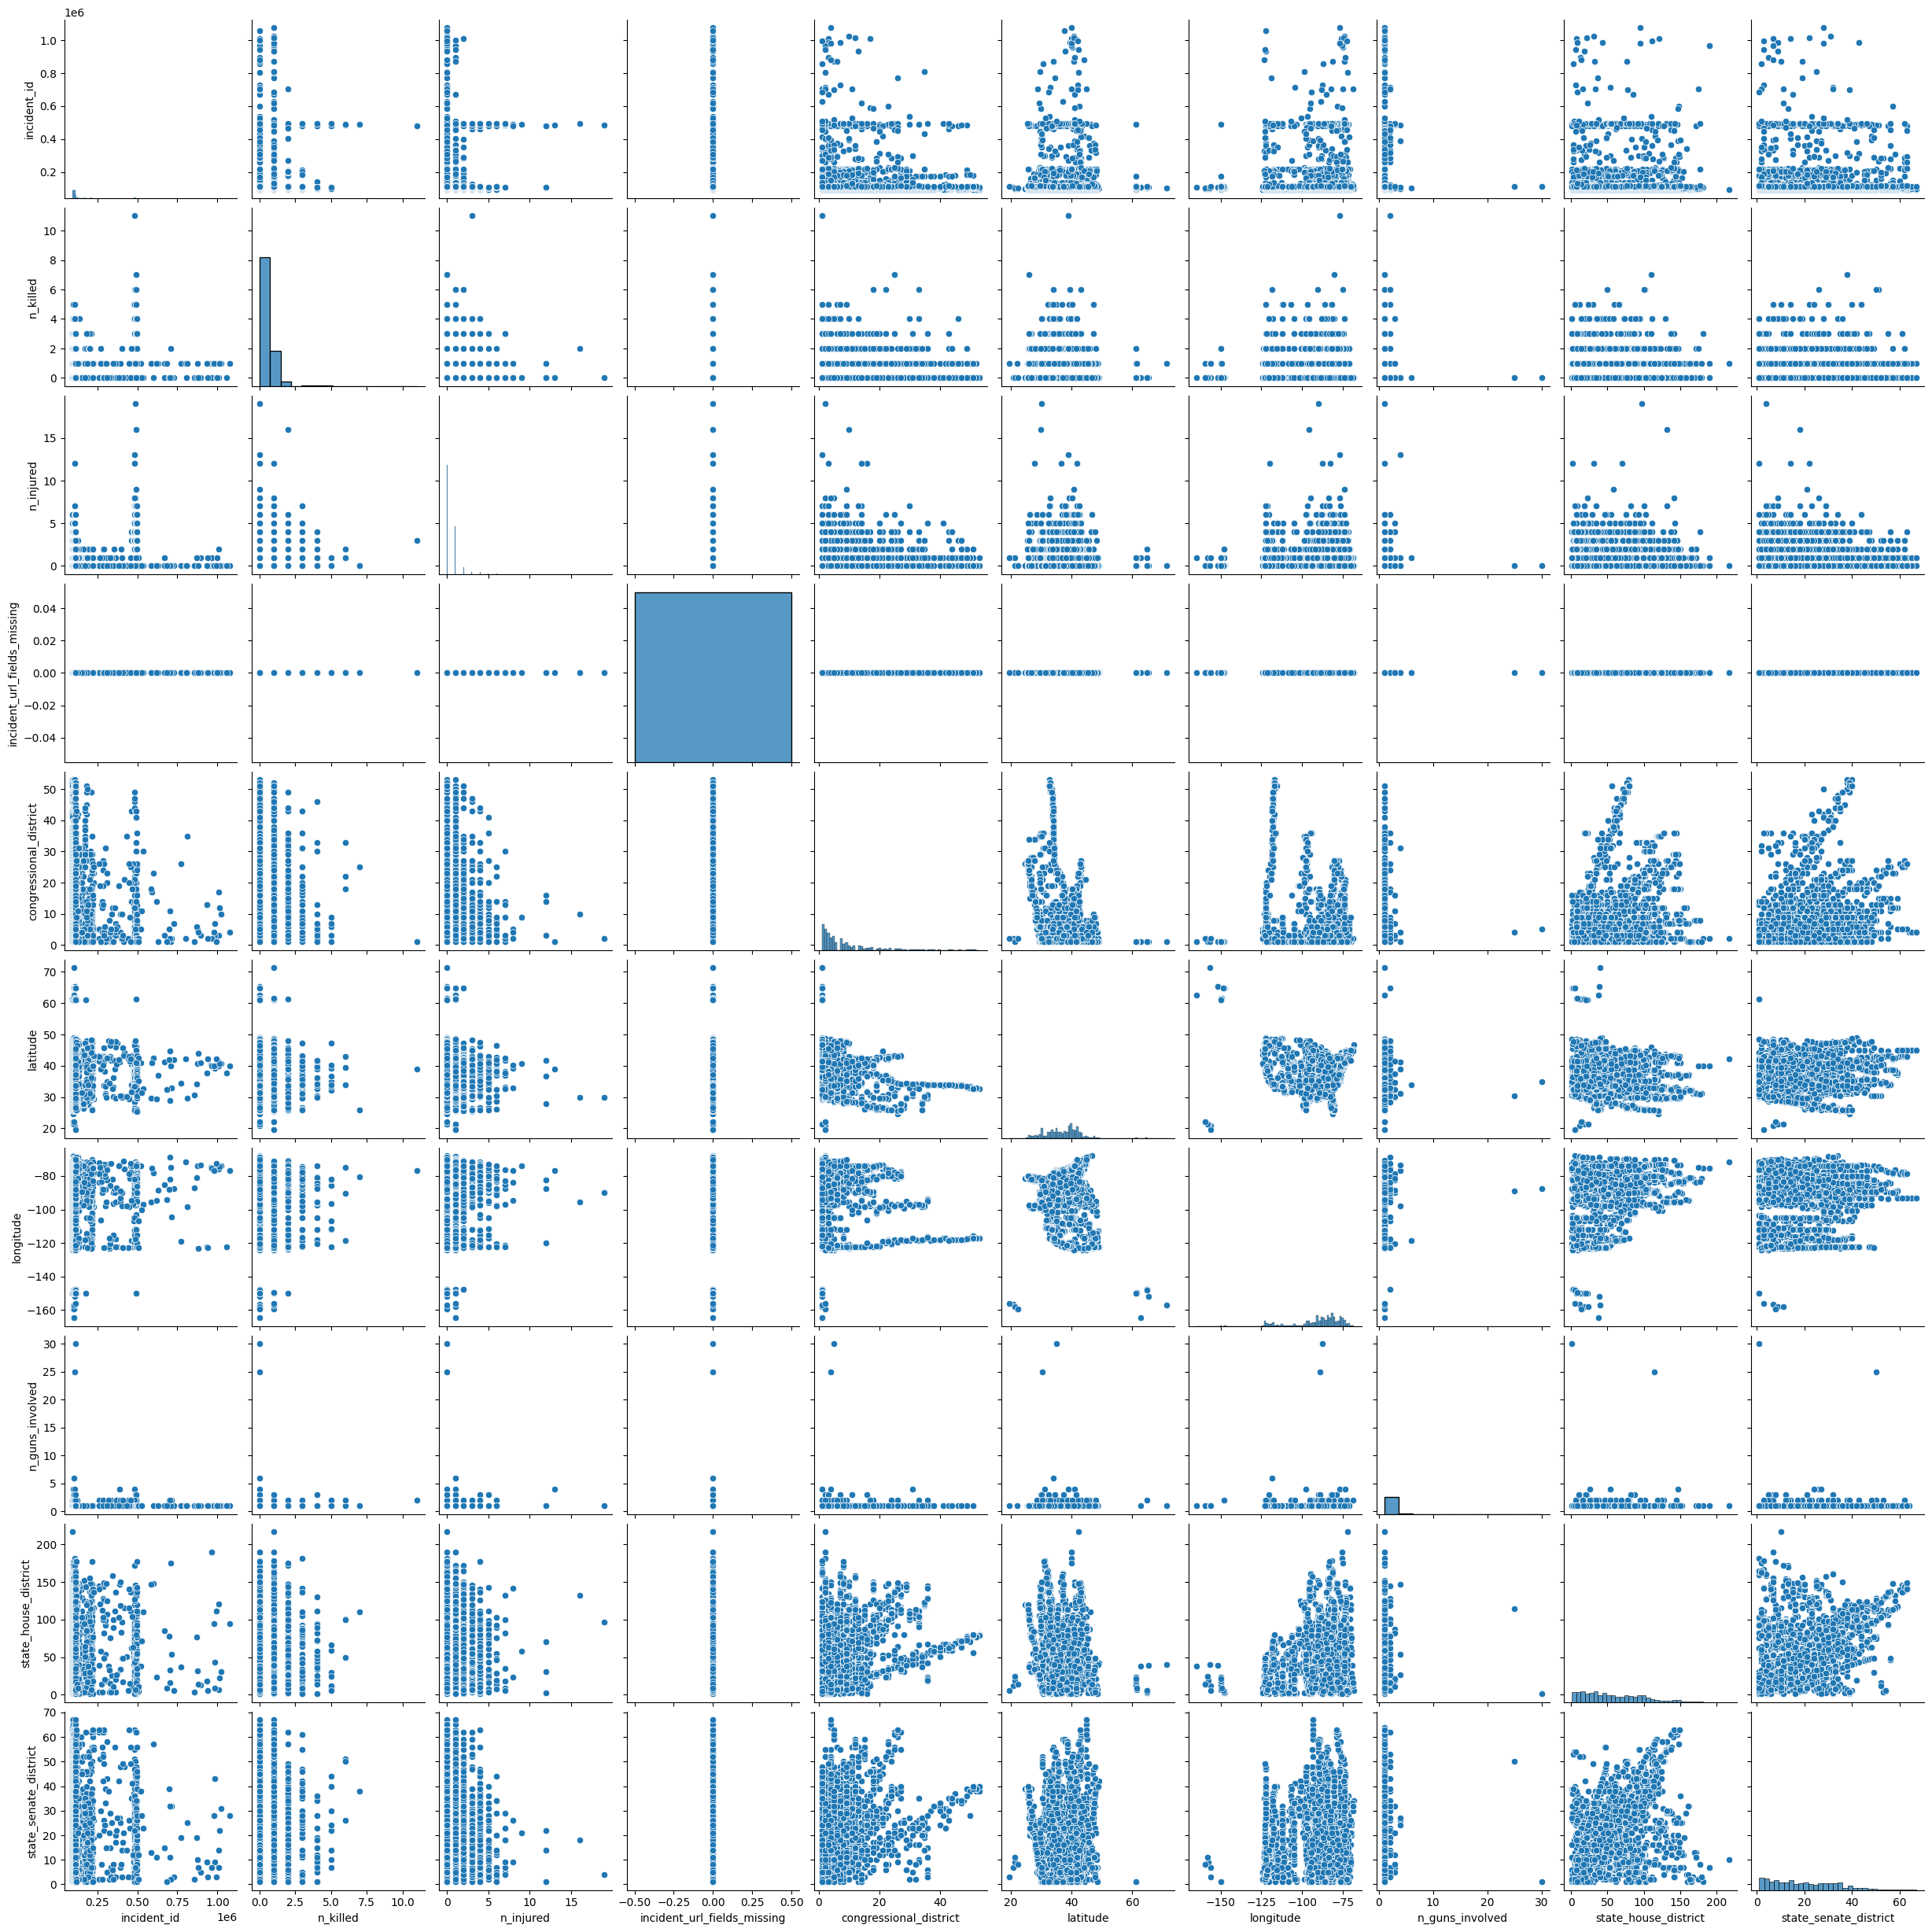

In [ ]:
sns.pairplot(dataframe)

**Data cleaning!!! : replacing blank boxes and NaN values!!!!**

In [35]:
daaframe = dataframe.replace(r'^\s*$', np.nan, regex=True)
dataframe = dataframe.replace(np.nan, 0)
dataframe.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,0,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,0.0,0.0,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,0,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,0,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,0,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,1
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,1


**Lets see all the columns to know what data to compare. Later we will
1. Get the values for all the columns using pandas.
2. Choose the right plot type for the visualization.
3. Visualize the data with both matplotlib and plotly.**

**2. Getting to know the columns, and choosing data for analysis.**

In [ ]:
columns = dataframe.columns
columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

**3. Number of people killed by state**

**3.1 Matplotlib histogram**

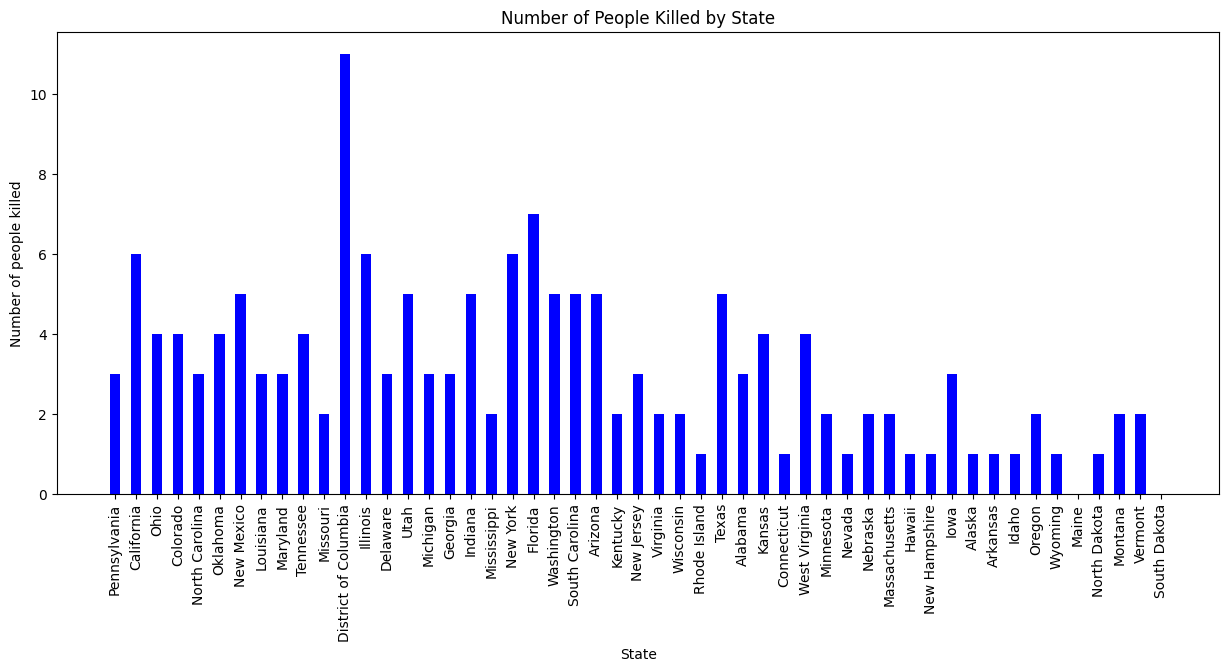

In [ ]:
states = dataframe['state']
num_killed = dataframe['n_killed']

mplt.figure(figsize=(15, 6))
mplt.bar(states, num_killed, color='blue', width=0.5)
mplt.xticks(rotation=90)
mplt.xlabel('State')
mplt.ylabel('Number of people killed')
mplt.title('Number of People Killed by State')
mplt.show()

**3.2 Plotly histogram**

In [ ]:
# Group data by state and sum the number of people killed
number_of_people_killed_by_state = dataframe.groupby('state')['n_killed'].sum().reset_index()

# Create the histogram
fig = px.histogram(number_of_people_killed_by_state,
                   x='state',
                   y='n_killed',
                   title='Number of People Killed by State')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Number of People Killed',
    xaxis={'categoryorder':'total descending'} # Order states by number of killed
)

fig.show()

**4. Latitute vs n_guns_involved. We will use a scatter plot here.**

**4.1 Matplotlib scatter plot.**

Text(0, 0.5, 'Number of Guns Involved')

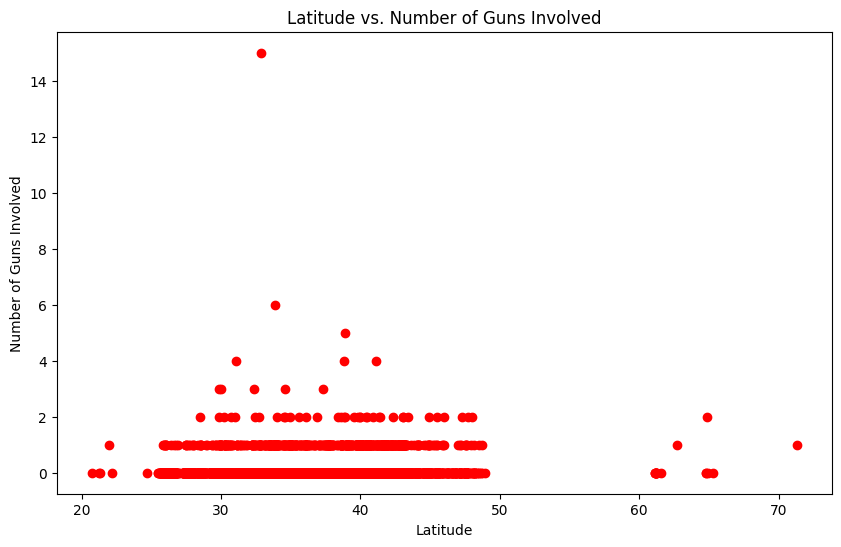

In [ ]:
latitude_vs_n_guns_involved = dataframe.groupby('latitude')['n_guns_involved'].sum()

# Create the scatter plot

mplt.figure(figsize=(10, 6))  # Adjust figure size if needed
mplt.scatter(latitude_vs_n_guns_involved.index, latitude_vs_n_guns_involved.values, color = "red")
mplt.title('Latitude vs. Number of Guns Involved')
mplt.xlabel('Latitude')
mplt.ylabel('Number of Guns Involved')

**4.2 Plotly scatter plot.**

In [36]:
# Assuming 'dataframe' is your Pandas DataFrame
fig = px.scatter(dataframe, x='n_guns_involved', y='latitude',
                 title='Number of Guns Involved vs. Latitude',
                 labels={'n_guns_involved': 'Number of Guns Involved', 'latitude': 'Latitude'})
fig.show(renderer="colab")

**5. Pie plot. Lets see what data we can use for a pie plot.**

**5.1 Number of injured by State ** **bold text**

**5.1.1. Matplotlib pie chart**

Text(0.5, 1.0, 'Number of Injured by State')

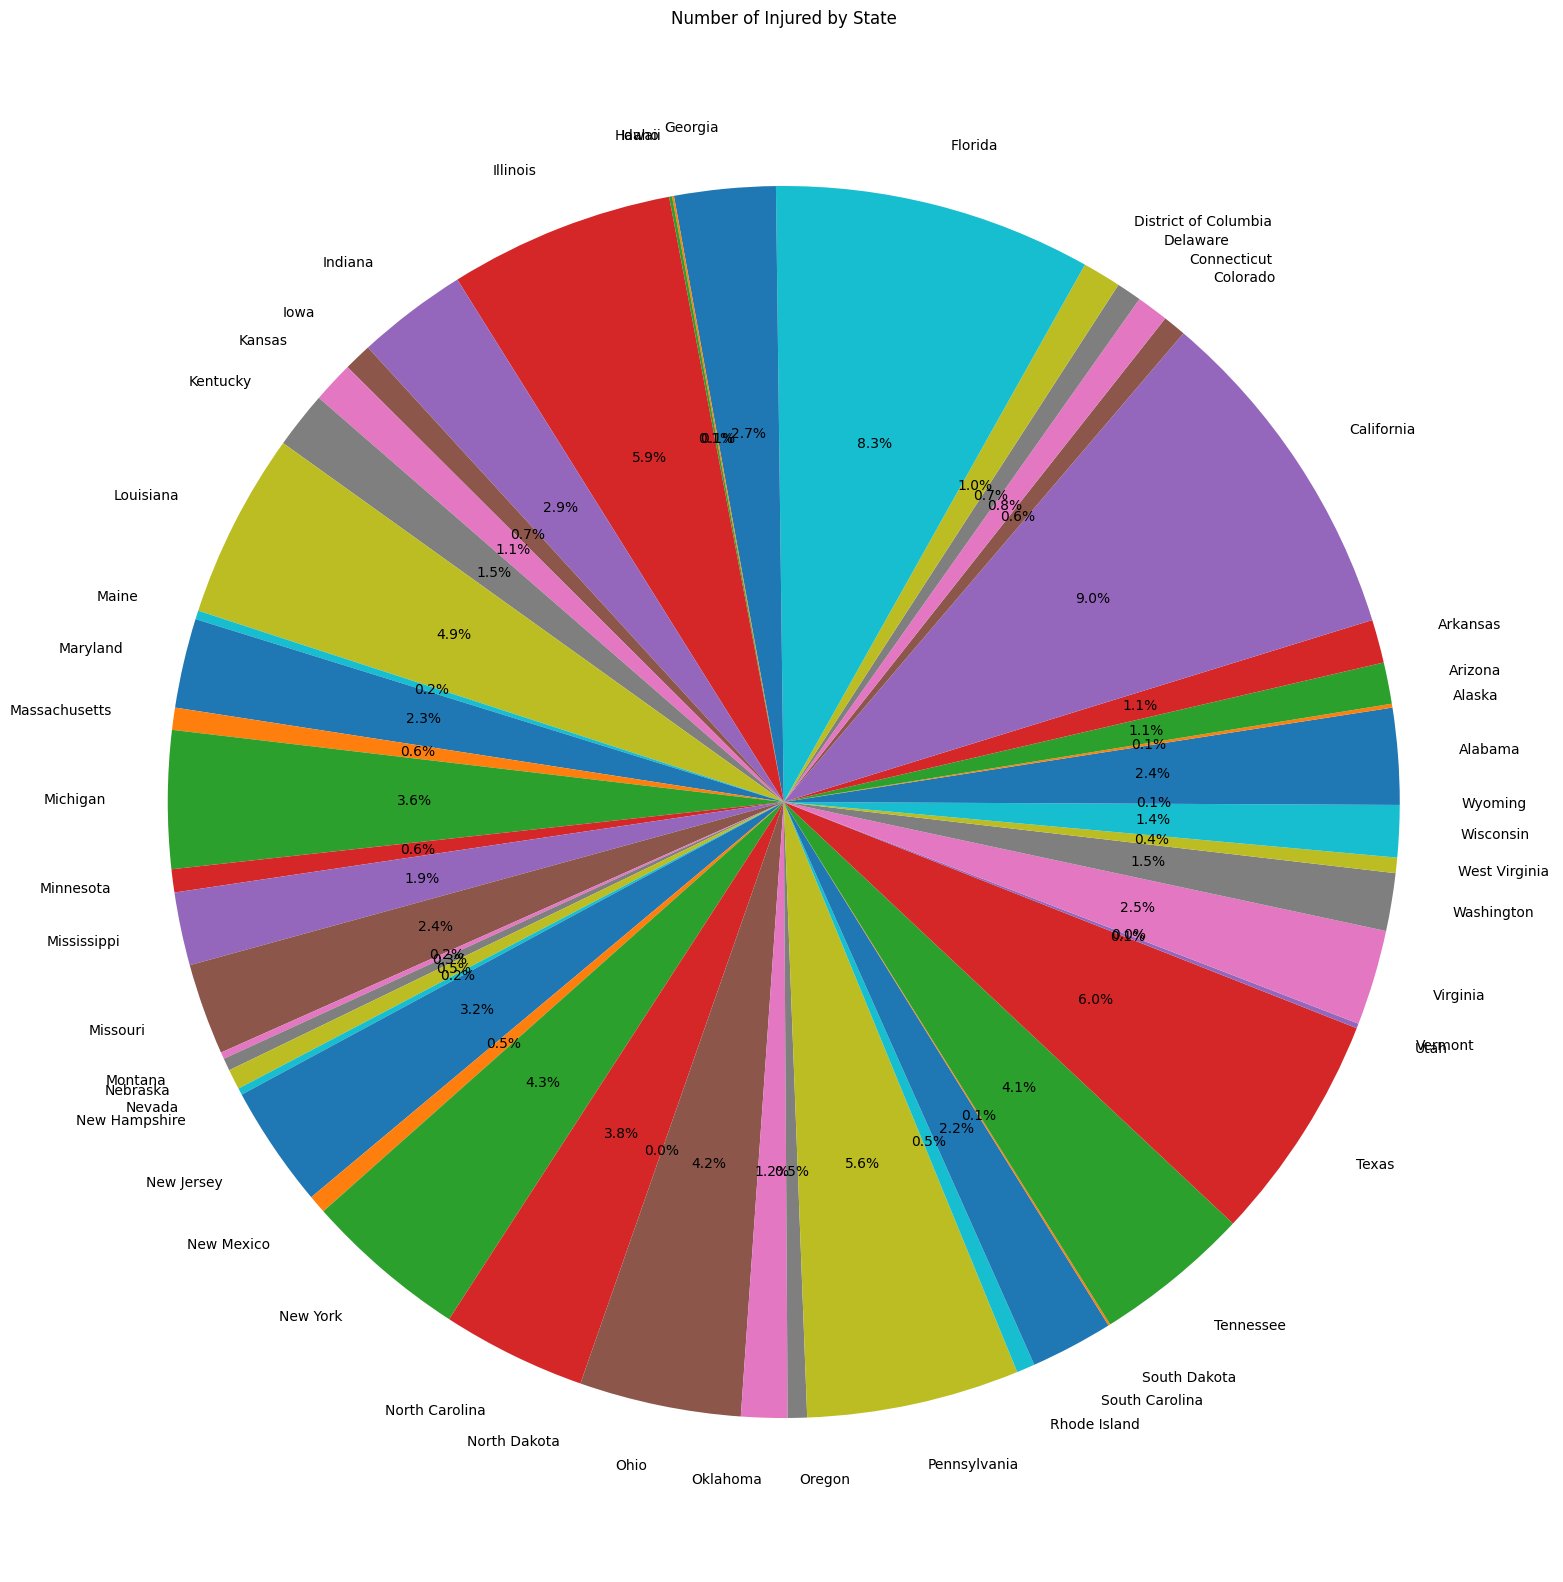

In [ ]:
number_of_injured_by_state = dataframe.groupby('state')['n_injured'].sum()

# Create the pie chart

mplt.figure(figsize=(20, 20))  # Adjust figure size if
mplt.pie(number_of_injured_by_state, labels=number_of_injured_by_state.index, autopct='%1.1f%%')
mplt.title('Number of Injured by State')

**5.1.2 Plotly pie chart**

In [44]:
px.pie(dataframe, names='state', values='n_injured', title='Number of Injured by State', width= 1000, height=1000)

**6. Lets compare date vs n_killed. If the number of killed people is somehow correlated with a date. For this we are going to use histograms (group by year?)**

**6.1 Matplotlib**

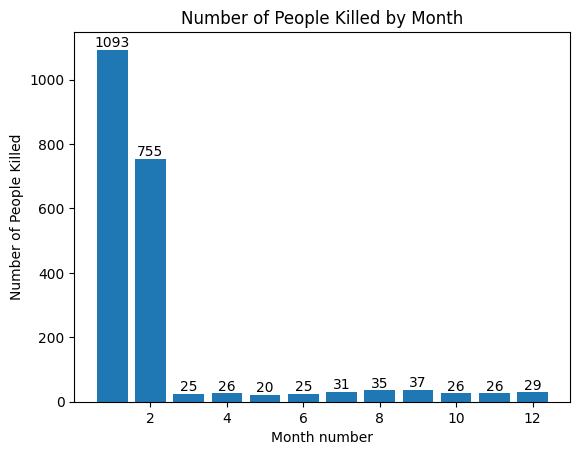

In [30]:
dataframe['year'] = pd.DatetimeIndex(dataframe['date']).month

num_of_people_killed_by_month = dataframe.groupby('year')['n_killed'].sum()

mplt.bar(num_of_people_killed_by_month.index, num_of_people_killed_by_month.values)
mplt.title('Number of People Killed by Month')
mplt.xlabel('Month number')
mplt.ylabel('Number of People Killed')

for index, value in enumerate(num_of_people_killed_by_month.values):
  mplt.text(num_of_people_killed_by_month.index[index], value, str(value), ha='center', va='bottom')

mplt.show()

**6.2 Plotly**

In [41]:
dataframe['year'] = pd.DatetimeIndex(dataframe['date']).month
num_of_people_killed_by_month = dataframe.groupby('year')['n_killed'].sum().reset_index()

# Create the bar chart
fig = px.bar(num_of_people_killed_by_month,
             x='year',
             y='n_killed',
             title='Number of People Killed by Month',
             labels={'year': 'Month Number', 'n_killed': 'Number of People Killed'})

# Add text annotations to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()